# Detecting Credit Card Fraud Transactions - Handling Imbalanced DataSets

In [1]:
import os
import pandas as pd
import numpy as np

import keras

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/anindyas/anaconda/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [3]:
# Visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib import rcParams
rcParams['figure.figsize'] = 18,4

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

sns.set(context='notebook', style='whitegrid', rc={"figure.figsize": (18,4)})

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# setting random seed for notebook reproducability
rnd_seed=42
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

## 1. Data Exploration:

In [5]:
data = pd.read_csv('data/creditcard.csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Pre-processing:

In [7]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [9]:
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## 3. Prepare Train and Test Set:

In [10]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [11]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rnd_seed)

In [14]:
X_train.shape, y_train.shape

((199364, 29), (199364,))

In [15]:
X_test.shape, y_test.shape

((85443, 29), (85443,))

## 4. Keras Neural Network:

### 4.1 Create Model:

In [16]:
model = Sequential([
    Dense(units=16,input_dim=29, activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


### 4.2 Model Training:

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 22s 110us/step - loss: 0.0088 - acc: 0.9986
Epoch 2/5
199364/199364 [==============================] - 23s 114us/step - loss: 0.0043 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 22s 109us/step - loss: 0.0038 - acc: 0.9993
Epoch 4/5
199364/199364 [==============================] - 22s 109us/step - loss: 0.0038 - acc: 0.9993
Epoch 5/5
199364/199364 [==============================] - 22s 110us/step - loss: 0.0035 - acc: 0.9993


### 4.3 Model Scoring:

In [20]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 20us/step


In [21]:
print(score)

[0.0031639424139762525, 0.99933288859239489]


### 4.4 Model Evaluation:

In [22]:
# Print Confusion Matrix
def print_confusion_matrix(cf_mat, class_names, figsize = (4,3), fontsize=10):
    df_cm = pd.DataFrame(cf_mat, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
y_pred = model.predict_classes(X_test)

In [24]:
cf_mat = confusion_matrix(y_test, y_pred)

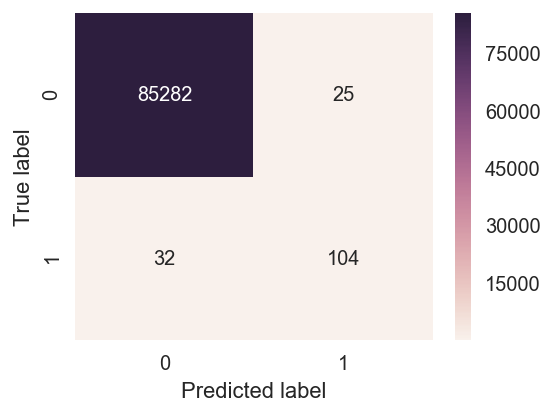

In [25]:
print_confusion_matrix(cf_mat, ['0', '1']);

### 4.5 Score On Entire DataSet:

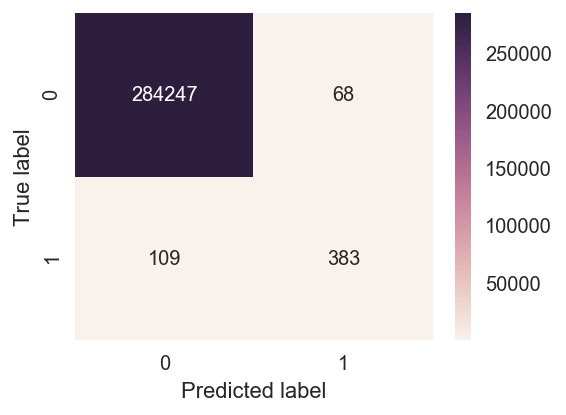

In [26]:
y_pred =  model.predict_classes(X)

cf_mat = confusion_matrix(y, y_pred)

print_confusion_matrix(cf_mat, ['0', '1']);

## 5. Random Forest:

### 5.1 Create Model:

In [27]:
rnf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

### 5.2 Model Training:

In [28]:
rnf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 5.3 Model Scoring:

In [29]:
rnf.score(X_test, y_test)

0.999602073897218

### 5.4 Model Evaluation:

In [30]:
y_pred = rnf.predict(X_test)

In [31]:
cf_mat = confusion_matrix(y_test, y_pred)

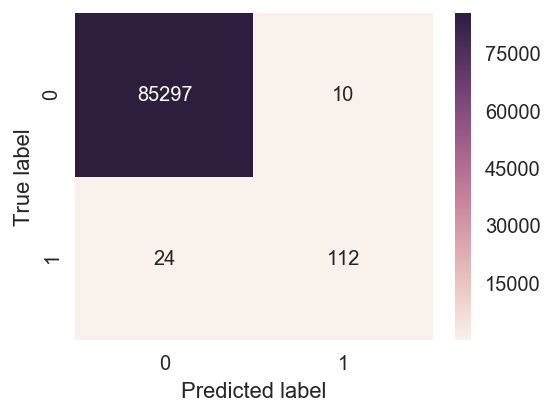

In [32]:
print_confusion_matrix(cf_mat, ['0', '1']);

### 5.5 Score On Entire DataSet:

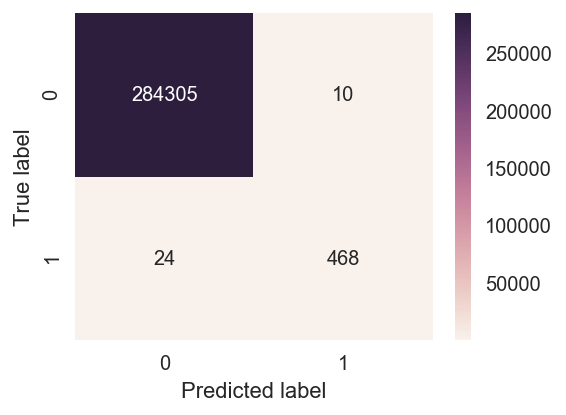

In [34]:
y_pred = rnf.predict(X)

cf_mat = confusion_matrix(y, y_pred)

print_confusion_matrix(cf_mat, ['0', '1']);

## 6. Decision Trees:

### 6.1 Create Model:

In [35]:
dtree = DecisionTreeClassifier()

### 6.2 Model Training:

In [36]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 6.3 Model Scoring:

In [37]:
dtree.score(X_test, y_test)

0.99922755521224671

### 6.4 Model Evaluation:

In [38]:
y_pred = dtree.predict(X_test)

In [39]:
cf_mat = confusion_matrix(y_test, y_pred)

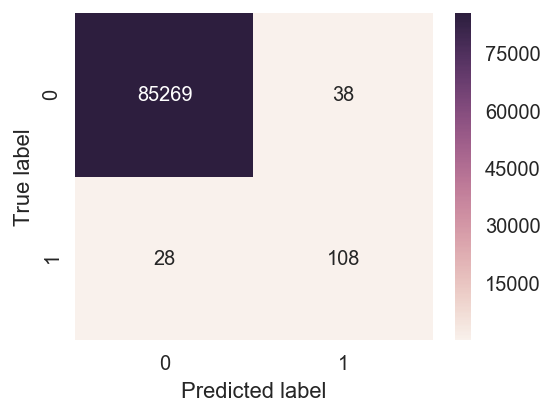

In [40]:
print_confusion_matrix(cf_mat, ['0', '1']);

### 6.5 Score On Entire DataSet:

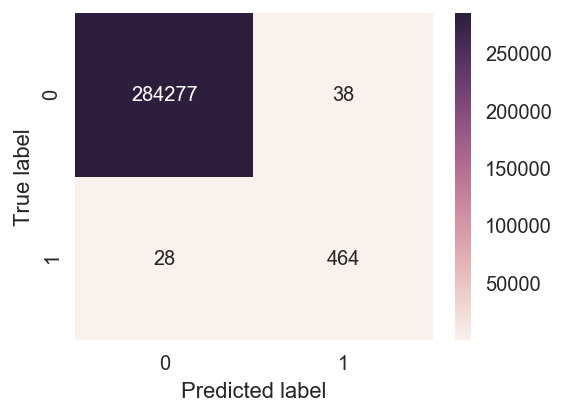

In [41]:
y_pred = dtree.predict(X)

cf_mat = confusion_matrix(y, y_pred)

print_confusion_matrix(cf_mat, ['0', '1']);

## 7. Sampling:

### 7.1 Random Undersampling:

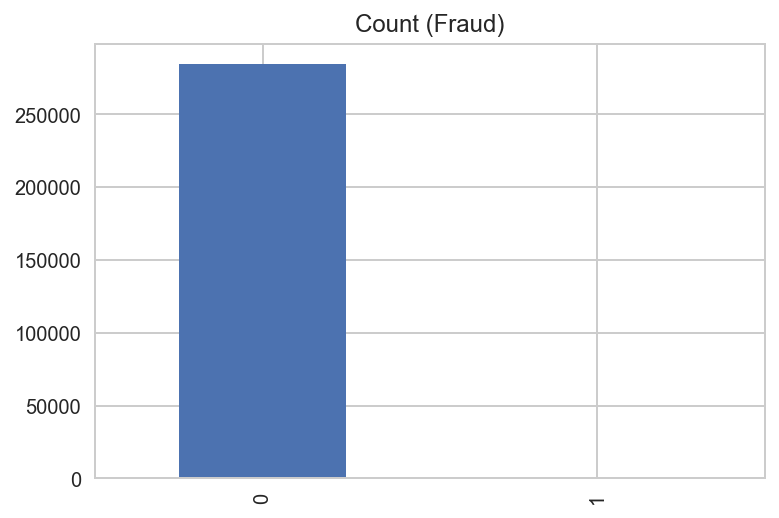

In [42]:
data['Class'].value_counts().plot(kind='bar', title='Count (Fraud)');

In [43]:
# class count
count_class_0, count_class_1 = data['Class'].value_counts()
count_class_0, count_class_1

(284315, 492)

In [44]:
# divide by class
data_class_0 = data[data['Class'] == 0]
data_class_1 = data[data['Class'] == 1]

In [45]:
data_class_0_under = data_class_0.sample(count_class_1, replace=False)
data_undersample = pd.concat([data_class_0_under, data_class_1], axis=0)

from sklearn.utils import shuffle
data_undersample = shuffle(data_undersample)

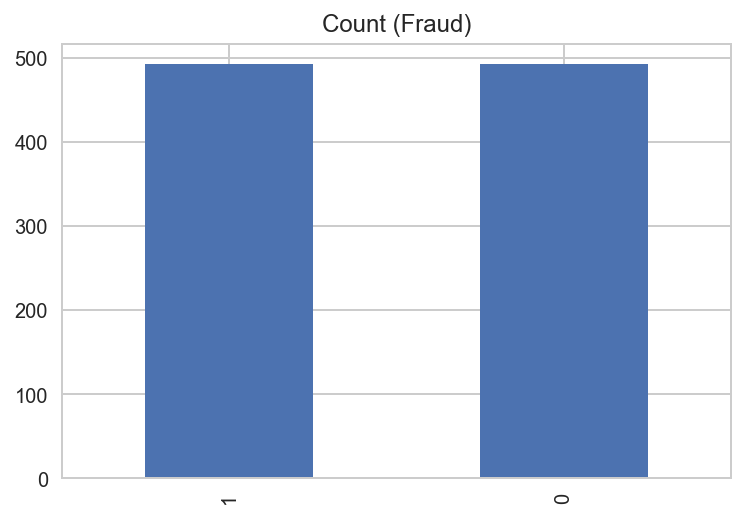

In [46]:
data_undersample['Class'].value_counts().plot(kind='bar', title='Count (Fraud)');

In [47]:
X_undersample = data_undersample.drop(['Class'], axis=1)
y_undersample = data_undersample['Class']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=rnd_seed)

In [49]:
X_train.shape, y_train.shape

((688, 29), (688,))

In [50]:
X_test.shape, y_test.shape

((296, 29), (296,))

#### Train on Random Undersampled Data Using Keras Neural Network:

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
688/688 [==============================] - 0s 684us/step - loss: 0.5654 - acc: 0.9157
Epoch 2/5
688/688 [==============================] - 0s 126us/step - loss: 0.2878 - acc: 0.9390
Epoch 3/5
688/688 [==============================] - 0s 128us/step - loss: 0.1721 - acc: 0.9433
Epoch 4/5
688/688 [==============================] - 0s 126us/step - loss: 0.1602 - acc: 0.9491
Epoch 5/5
688/688 [==============================] - 0s 125us/step - loss: 0.1616 - acc: 0.9491


In [53]:
score = model.evaluate(X_test, y_test)

296/296 [==============================] - 0s 159us/step


In [54]:
print(score)

[0.12056312508679726, 0.95270270270270274]


In [55]:
y_pred = model.predict_classes(X_test)

In [56]:
cf_mat = confusion_matrix(y_test, y_pred)

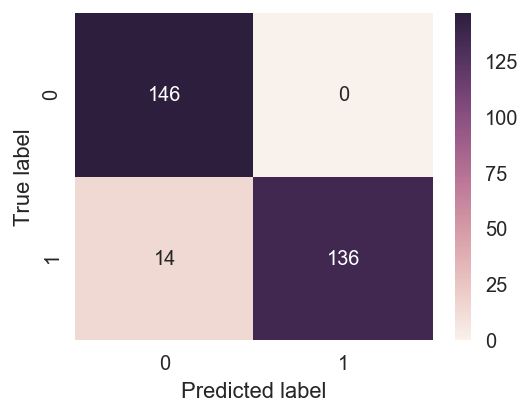

In [57]:
print_confusion_matrix(cf_mat, ['0', '1']);

### 7.2 SMOTE Oversampling:

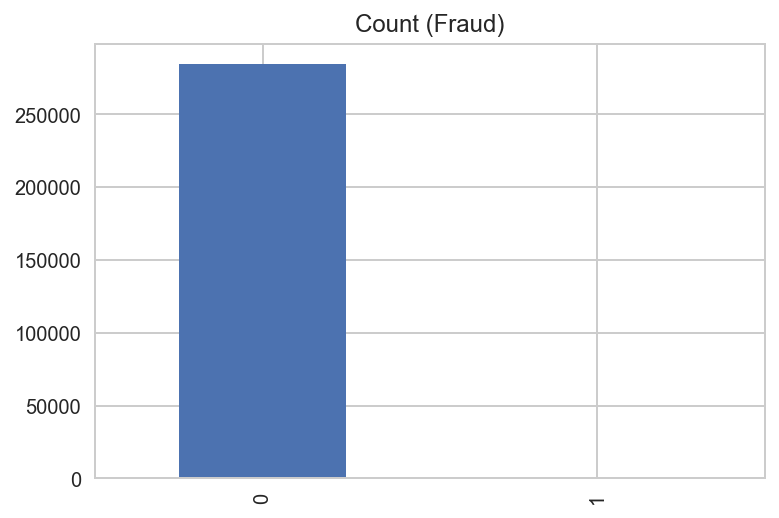

In [58]:
data['Class'].value_counts().plot(kind='bar', title='Count (Fraud)');

In [59]:
# We'll use ratio='minority' to resample the minority class.
X_resample, y_resample = SMOTE(ratio='minority', n_jobs=-1).fit_sample(X, y)

In [60]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.Series(y_resample)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=rnd_seed)

In [62]:
X_train.shape, y_train.shape

((398041, 29), (398041,))

In [63]:
X_test.shape, y_test.shape

((170589, 29), (170589,))

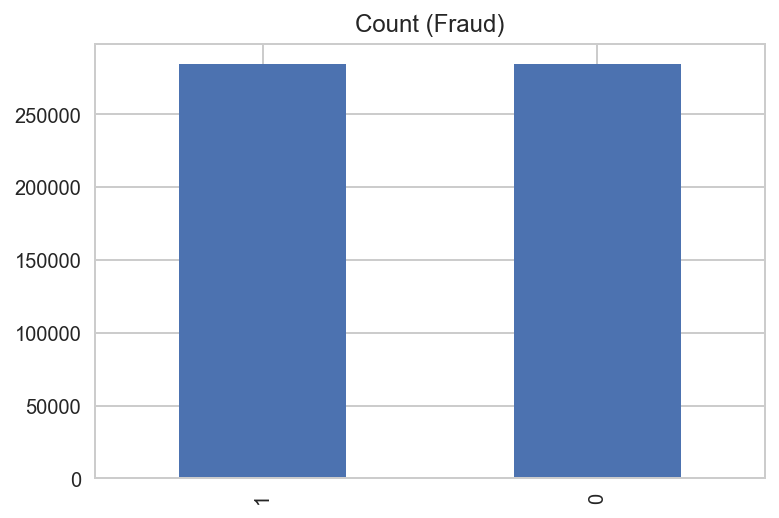

In [64]:
y_resample.value_counts().plot(kind='bar', title='Count (Fraud)');

#### Train on SMOTE Resampled Data Using Keras Neural Network:

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
398041/398041 [==============================] - 45s 113us/step - loss: 0.0311 - acc: 0.9894
Epoch 2/5
398041/398041 [==============================] - 44s 111us/step - loss: 0.0138 - acc: 0.9964
Epoch 3/5
398041/398041 [==============================] - 44s 111us/step - loss: 0.0119 - acc: 0.9970
Epoch 4/5
398041/398041 [==============================] - 45s 112us/step - loss: 0.0105 - acc: 0.9975
Epoch 5/5
398041/398041 [==============================] - 44s 111us/step - loss: 0.0095 - acc: 0.9977


In [67]:
score = model.evaluate(X_test, y_test)

170589/170589 [==============================] - 4s 21us/step


In [68]:
print(score)

[0.0080017468167707714, 0.99815345655347065]


In [69]:
y_pred = model.predict_classes(X_test)

In [70]:
cf_mat = confusion_matrix(y_test, y_pred)

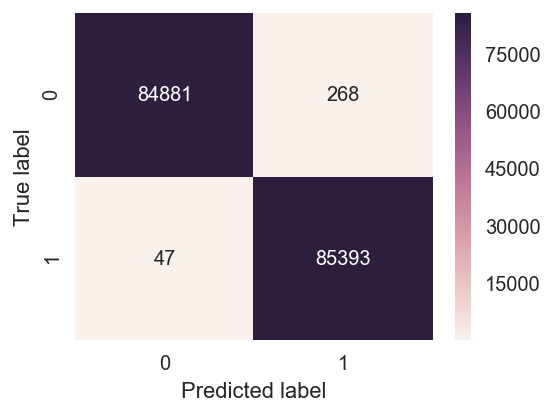

In [71]:
print_confusion_matrix(cf_mat, ['0', '1']);